In [215]:
#Import the required libraries for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [114]:
#load the dataset file placed in the same folder as Jupyter notebook is created 
insurance_df= pd.read_csv('insurance.csv')

In [115]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

In [117]:
#EDA - shape of Data
insurance_df.shape

(1338, 7)

In [118]:
#number of points & numer of features
print('No. of features:', insurance_df.shape[1])
print('No. of Datapoints:', insurance_df.shape[0])

No. of features: 7
No. of Datapoints: 1338


In [119]:
#EDA type of data
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Observation: numerical cols - age, bmi, children, charges;
             categorical cols - sex, smoker, region

In [120]:
#EDA - Checking the presence of missing values
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observation: There are no missing values in this dataset. So there is no need to do data imputation.

In [121]:
# EDA 5 point summary of numerical attributes
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observation:

1. The age of the customer vary from 18 to 64 with the median(50%) of 39 and average age is 39. Looking at the age column, data    looks representative of the true age distribution of the adult population(age min is 18).
2. 75% customer having not more than 2 children.

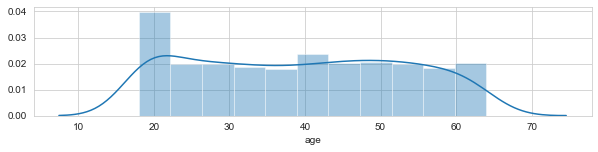

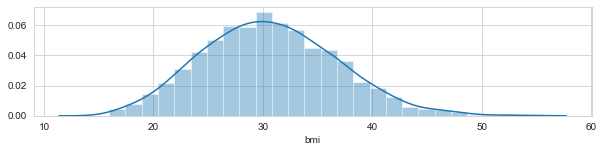

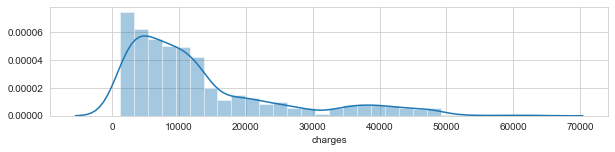

In [122]:
# EDA Distribution of ‘bmi’, ‘age’ and ‘charges’ columns
col=['age','bmi','charges']
for ind in col:
  plt.figure(figsize=(10,2))
  sns.distplot(insurance_df[ind])
  plt.show()

Observation:  

age - High number of data points arround 20yrs age customer.

bmi - Its in considerable good shape not much left skewness is present. Very less people with lower bmi exists in the dataset.

charges - High right skewness in the dataset, most people would require basic medi-care and only few suffer from diseases which cost more

In [123]:
# EDA Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
insurance_df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

Observation:

1. Skewness for age,bmi is almost 0, from the above graphs and skew values we can say bmi is approx normally distributed and age having almost uniform distribution.
2. But for charges having postivive skewness i.e we will find right tail.

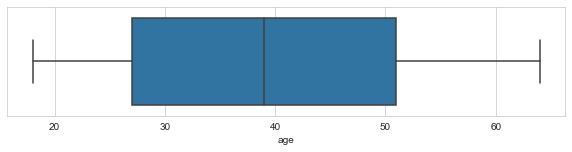

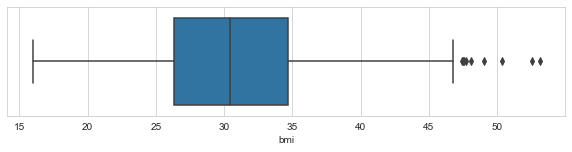

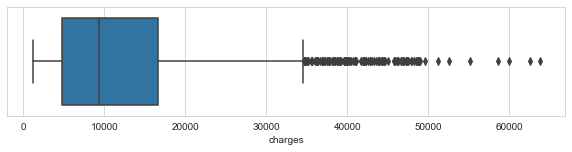

In [124]:
# EDA Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
col=['age','bmi','charges']
for ind in col:
  plt.figure(figsize=(10,2))
  sns.boxplot(data=insurance_df,x=ind)
  plt.show()

observation:

1. age: There is no outlyers.
2. bmi: There are few points between 47 to 58, these are outliers as there are not included in the box of other observation i.e    no where near the quartiles.
3. charges: There are several points after 34000, these outlayers are not included in the box.Charges attribute is having much      outliers which might impact the model.

In [211]:
col=['age','bmi','charges']
for ind in col:
  Q1=np.percentile(insurance_df[ind], 25)
  Q3=np.percentile(insurance_df[ind], 75)
  IQR=Q3-Q1
  lower_whisker=Q1-IQR*1.5
  upper_whisker=Q3+IQR*1.5
  outlayers=insurance_df[(insurance_df[ind]>upper_whisker)|(insurance_df[ind]<lower_whisker)][ind]
  print('NO of outlayers for {} is: {}'.format(ind, len(outlayers)))

NO of outlayers for age is: 0
NO of outlayers for bmi is: 9
NO of outlayers for charges is: 139


# EDA Distribution of categorical columns (include children)

1. Univariate Analysis

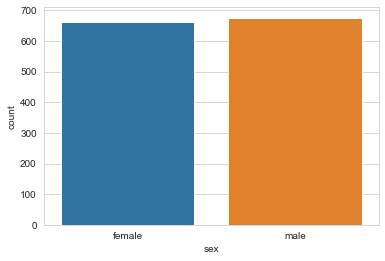

In [126]:
sns.countplot(insurance_df['sex'])

Observation: There is no difference in gender ratio

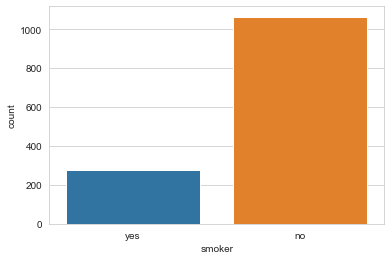

In [127]:
sns.countplot(insurance_df['smoker'])

Observation: number of non smokers is more than smoker in this data set

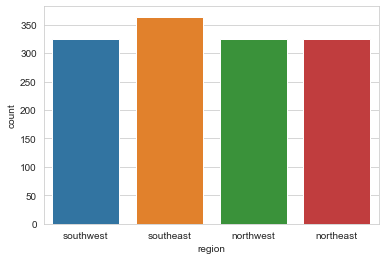

In [128]:
sns.countplot(insurance_df['region'])

Observation: There is no difference in regionwise, we can say almost equally distrubuted across the region

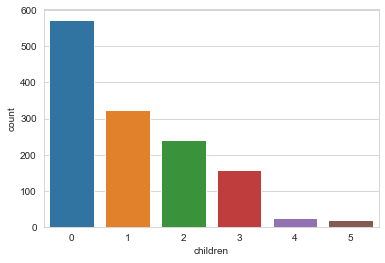

In [129]:
sns.countplot(insurance_df['children'])

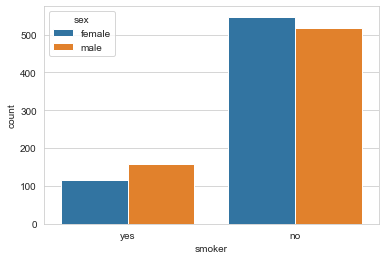

In [130]:
sns.countplot(insurance_df['smoker'],hue = insurance_df['sex'])

Observation: Genderwise there is no smoking difference.

2. Bivariate analysis

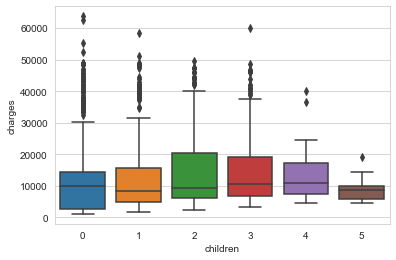

In [131]:
sns.boxplot( data=insurance_df,x='children', y='charges')

Observation: Customer having no children paid higher charges and paid less charges having 5 children

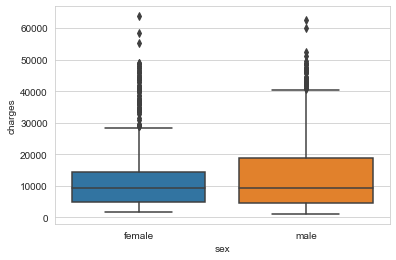

In [132]:
sns.boxplot(data=insurance_df,x='sex', y='charges')

Observation: Female has more outlayes and male data having right tail. We can say some male customers pay higher charges

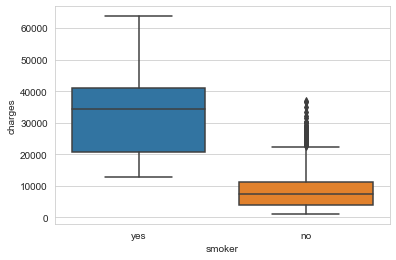

In [133]:
sns.boxplot(x='smoker', y='charges',data=insurance_df)

Observation: Smokers pay higher charges than the non-smokers. Also some outliers present in the nonsmoker who pay higher charges.

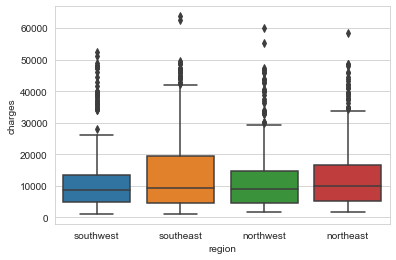

In [134]:
sns.boxplot(data=insurance_df,x='region', y='charges')

Observation: southeast region customers pay more higher charges.

## EDA Pair plot that includes all the columns of the data frame

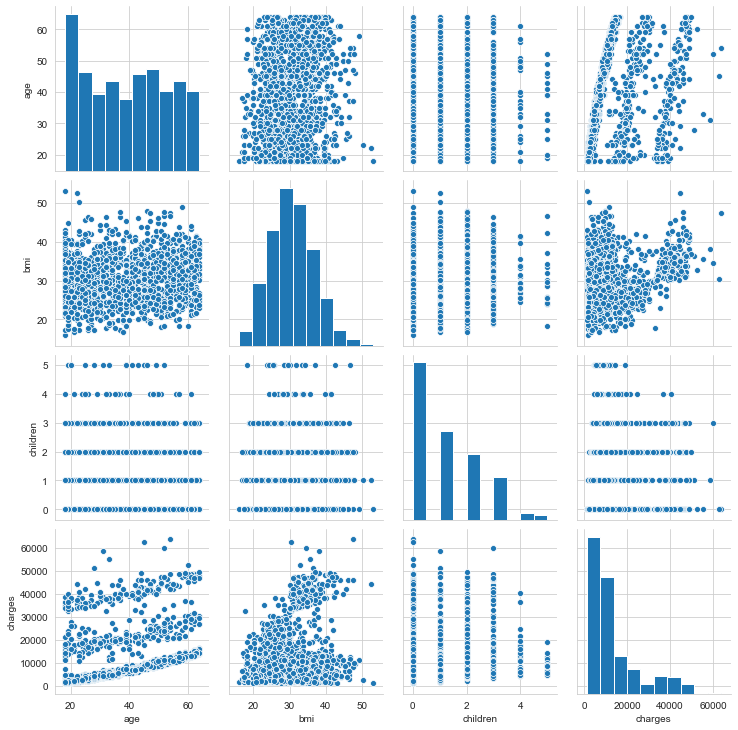

In [135]:
#Pair plot for numerical columns of the data frame
sns.set_style("whitegrid");
sns.pairplot(insurance_df)
plt.show()

In [136]:
#To plot the caterogical columns as well, we need to convert them into numerical. Hence we need to perform the encoding tech
insurance_df_copy=insurance_df.copy()
# make a dataframe which only has categorical variables
dataobject=insurance_df_copy.select_dtypes(['object'])
# Label encoding function
def labelencode(columnname):
    insurance_df_copy[columnname] = LabelEncoder().fit_transform(insurance_df_copy[columnname])
for i in range(0,len(dataobject.columns)):
    labelencode(dataobject.columns[i])

insurance_df_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


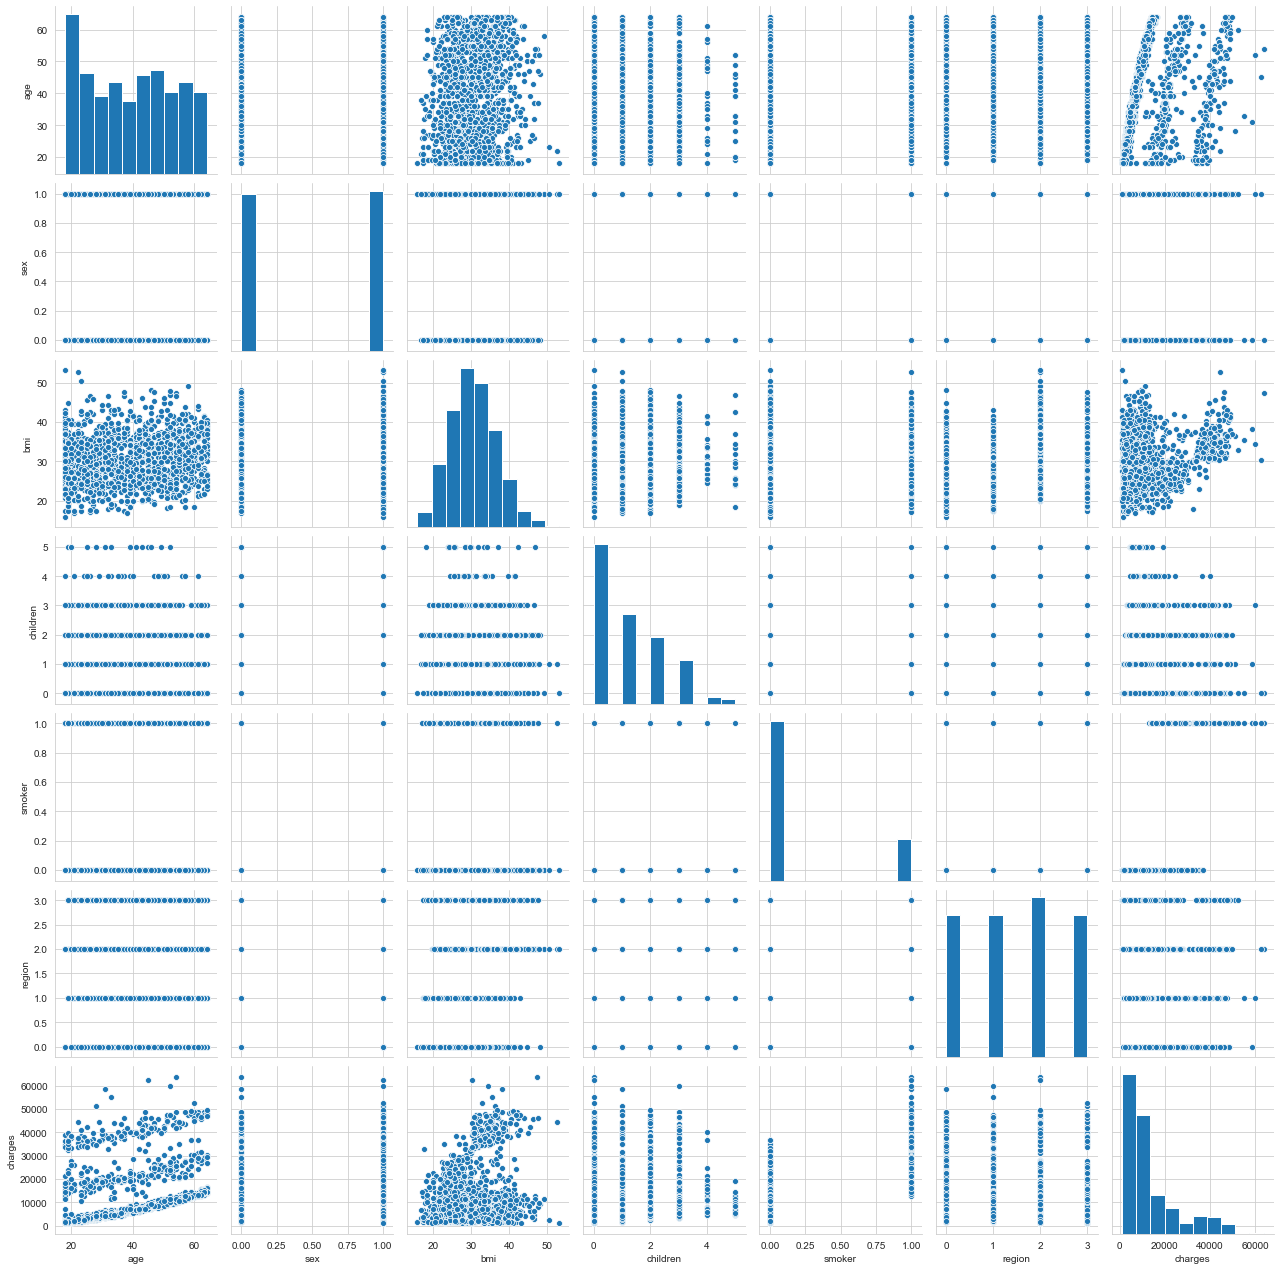

In [137]:
sns.pairplot(insurance_df_copy)
plt.show()

Observation: smokers claimed more money than non-smokers. Positive coorelation between 'age' and 'charges', charges is increased as age increased. Older people are charged more.

# Hypothesis Testing

## Do charges of people who smoke differ significantly from the people who don't ?

In [138]:
h0="Charges of smoker and non-smoker are same"
h1="Charges of smoker and non-smoker are not the same"
#we have 1 sample for smoker and 1 sample of nonsmoker, hence we will perform the 2-sample test for charges 
#sample of nonsmoker
sample_nonsmoker=insurance_df[insurance_df.smoker == 'no']['charges']
#sample of nonsmoker
sample_smoker=insurance_df[insurance_df.smoker == 'yes']['charges']
t_value, p_value  = stats.ttest_ind(np.array(sample_smoker),np.array(sample_nonsmoker),axis=0)
#assuming significance level = 0.05 
if(p_value>0.05):
   print('p_value:{} is grater than 0.05:failed to reject h0'.format(p_value))
else:
    print('p_value:{} is less than 0.05:reject h0'.format(p_value))

p_value:8.271435842177219e-283 is less than 0.05:reject h0


Observation: Rejecting the null hypothesis as the p_value is lesser than 0.05. I.e.Charges of smoker and non-smoker are not the same

## Does bmi of males differ significantly from that of females?

In [157]:
h0="bmi is not dependent on gender"
h1="bmi is dependent on gender"
#we have 1 bmi sample for male and 1 bmi sample of female, hence we will perform the 2-sample test for BMI 
#sample of male
sample_male=insurance_df[insurance_df['sex'] == 'male']['bmi']
#sample of female
sample_female=insurance_df[insurance_df['sex'] == 'female']['bmi']
t_value, p_value  = stats.ttest_ind(np.array(sample_male),np.array(sample_female), axis = 0)
#assuming significance level = 0.05
if(p_value>0.05):
   print('p_value:{} is greater than 0.05:failed to reject h0'.format(p_value))
else:
    print('p_value:{} is less than 0.05:reject h0'.format(p_value))

p_value:0.08997637178984932 is greater than 0.05:failed to reject h0


Observation : There is no dependency of bmi on gender

## Is the proportion of smokers significantly different in different genders?

In [212]:
h0='smoking habits not differs with the gender'#p1=p2
h1='smoking habits differs with the gender'#p1!=p2
#proportion test for 2 sample.
# number of male smokers
male_smokers = insurance_df[insurance_df['sex'] == 'male'].smoker.value_counts()[1]
# number of female smokers
female_smokers = insurance_df[insurance_df['sex'] == 'female'].smoker.value_counts()[1]
#number of males in the data
n_males = insurance_df.sex.value_counts()[0]
#number of females in the data
n_females = insurance_df.sex.value_counts()[1]
print([female_smokers, male_smokers] , [n_females, n_males])
print('Proportion of smokers in females:{}, males:{}'.format(round(female_smokers/n_females,2)*100,round(male_smokers/n_males,2)*100))
t_value, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])
#assuming significance level = 0.05
if(p_value>0.05):
   print('p_value:{} is grater than 0.05: failed to reject h0'.format(p_value))
else:
    print('p_value:{} is less than 0.05: reject h0'.format(p_value))

[115, 159] [662, 676]
Proportion of smokers in females:17.0, males:24.0
p_value:0.005324114164320532 is less than 0.05: reject h0


Observation: smoking habits differs with the gender

## Is the distribution of bmi across women with no children, one child and two children, the same ?

In [213]:
h0 = 'bmi across women with no children, one child and two children is same'#u1=u2=u3
h1 = 'bmi across women with no children, one child and two children is not same'#u1!=u2!=u3
#perform ANOVA test for multiple samples(compare the mean values)

#No of female customers with no child
female_child0 = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 0)]['bmi']
#No of female customers with 1 child
female_child1 = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 1)]['bmi']
#No of female customers with 2 children
female_child2 = insurance_df[(insurance_df['sex'] == 'female') & (insurance_df['children'] == 2)]['bmi']

f_stat,p_value = stats.f_oneway(np.array(female_child0),np.array(female_child1),np.array(female_child2))
print(p_value)
#assuming significance level = 0.05
if(p_value>0.05):
   print('p_value:{} is greater than 0.05:failed to reject h0'.format(p_value))
else:
    print('p_value:{} is less than 0.05:reject h0'.format(p_value))
 



0.7158579926754841
p_value:0.7158579926754841 is greater than 0.05:failed to reject h0


Observation: bmi of female doesnt depend on the no of children